**Word Embedding** is a technique to transform text into vectors of real numbers.
This transformation is necessary because many Machine Learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. 

We can achieve above using Frequency based Embedding or Predictive based embeddings.

Word2Vec is a predictive embedding model.
It was developed at Google by a research team led by Tomas Mikolov
(Paper : Efficient Estimation of Word Representations : https://arxiv.org/pdf/1301.3781.pdf )

The paper shares the following result:
“Using a word offset technique where simple algebraic operations are performed on the word vectors, it was shown for example that vector(”King”) — vector(”Man”) + vector(”Woman”) results in a vector that is closest to the vector representation of the word Queen.”

Diagram :

Word2vec is not a single algorithm but a combination of two techniques — CBOW(Continuous bag of words) and Skip-gram model. Word2vec can utilize either of two model architectures to produce a distributed representation of words.

In the continuous bag-of-words architecture, the model predicts the current word from a window of surrounding context words.
In the  skip-gram architecture, the model uses the current word to predict the surrounding window of context words. 

Diagram : 

Consider the example-

Surely son half  **kingdom** is better than none. 

Kingdom is our target word and son, half, is, better belong to context of kingdom.
The thought/assumption is that :
Words which are used and occur in the same contexts tend to purport similar meaning
Implementation of context window in word2vec is dynamic
A dynamic context window has a maximum window size. Context is sampled from the maximum window size with probability 1/d, where d is the distance between the word to the target.

Consider target word kingdom using dynamic context window with max_size=2
(half,is) have 1/1 probability of being included in the context since they are one word away
(son,better) have a 1/2 probability of being included in the context since they are two words away

Using this concept, the Continuous Bag of Words and the Skip Gram model separates data into observations of target words and their context.
Continuous Bag of Words -
We structure the data such that the context is used to predict the target word. For example, if our context is (son,half,is,better), we use that as features of the class kingdom.
Skip Gram
We structure the data such that the target word is used to predict the context. For example, we use the feature (kingdom) to predict the context (son,half,is,better)

Few of the advantages over traditional methods are listed below.
The generated word vectors are lower in dimension, and are more computationally efficient.
Word embedding allows words with similar meaning to have similar vector representation.


Now that we have a basic understanding of word embeddings and Word2Vec, lets get our hands dirty with some code. In this article we will be using Gensim implementation of Word2Vec. Gensim is an open source Python library for natural language processing, with a focus on topic modeling.

Below implementation is divided into :
1. Data pre processing
2. Training the model
3. Playing around with the model
4. Visualising it

##1.Data pre processing


Data Source : GOT books in text format

Link : https://www.kaggle.com/khulasasndh/game-of-thrones-books/downloads/game-of-thrones-books.zip/1 
    
    

Gensim’s word2vec expects a sequence of sentences as its input. Each sentence a list of words (utf8 strings).
Here we read the fies in the dataset one by one and break each file into sentences and then tokenize it.

Tip : Explore more on the generators in Python


In [0]:

import os
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize

class MySentences(object):
  def __init__(self,dirname):
    self.dirname = dirname
    self.sentence_count = 0
    
  def __iter__(self):
    for fname in os.listdir(self.dirname):
      with open(os.path.join(self.dirname,fname),encoding="utf8", errors='ignore' ) as f_input:
        corpus = f_input.read()
        raw_sentences = sent_tokenize(corpus)
        for sentence in raw_sentences:
          if len(sentence) > 0:
            self.sentence_count += 1
            sentence.encode('utf-8').strip()
            yield simple_preprocess(sentence)
            ''' Pre processing :
            gensim.utils.simple_preprocess-
             Convert a document into a list of tokens.
             This lowercases, tokenizes, de-accents (optional). – the output are final tokens = unicode strings, that won’t be processed any further.
            '''
            
           
            
sentences = MySentences("/content/drive/My Drive/Colab Notebooks/Got_dataset")
#Takes a very long time since it goes to each file tokenizes into sentence and then to words
#for i in sentences:
#  print(i)

You'll get something like-

['game', 'of', 'thrones', 'book', 'one', 'of', 'song', 'of', 'ice', 'and', 'fire', 'by', 'george', 'martin', 'prologue', 'we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them']
['the', 'wildlings', 'are', 'dead']
['do', 'the', 'dead', 'frighten', 'you']
['ser', 'waymar', 'royce', 'asked', 'with', 'just', 'the', 'hint', 'of', 'smile']
['gared', 'did', 'not', 'rise', 'to', 'the', 'bait']
['he', 'was', 'an', 'old', 'man', 'past', 'fifty', 'and', 'he', 'had', 'seen', 'the', 'lordlings', 'come', 'and', 'go']
['dead', 'is', 'dead', 'he', 'said']
['we', 'have', 'no', 'business', 'with', 'the', 'dead']
['are', 'they', 'dead']
['royce', 'asked', 'softly']
['what', 'proof', 'have', 'we']



##2.Training the model

In [0]:
model = Word2Vec(sg=1,size=300,window=10,min_count=3,workers=4)
model.build_vocab(sentences)
model.train(sentences=sentences,total_examples=model.corpus_count,epochs=model.epochs)
model.save('GOT_vectors.w2v')


'''
Parameters explanation :

sg :Training algorithm: 1 for skip-gram; otherwise CBOW.
size: Dimensionality of the word vectors. This parameter for altering the size of the NN layers. Bigger size values require more training data, but can lead to better (more accurate) models.
window The size of the window determines how many words before and after a given word would be included as context words of the given word.
min_count: Words that appear only once or twice in a billion-word corpus are probably uninteresting typos and garbage, so its best to get rid of those.
workers: Use these many worker threads to train the model.

For more detailed : Gensim API-
https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html#gensim.models.Word2Vec

'''

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


##3.Playing around with the model

In [0]:
model.most_similar('daenerys', topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('stormborn', 0.7775975465774536),
 ('khaleesi', 0.7446895241737366),
 ('targaryen', 0.7176743745803833),
 ('unburnt', 0.7083081007003784),
 ('kneel', 0.7010558843612671)]

In [0]:
model.most_similar('eddard', topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('eddards', 0.7529487609863281),
 ('executed', 0.7379212379455566),
 ('lyanna', 0.7162431478500366),
 ('beheaded', 0.7123080492019653),
 ('farewell', 0.6969554424285889)]

In [0]:
model.most_similar('arya', topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sansa', 0.6978222727775574),
 ('gendry', 0.6462435722351074),
 ('brienne', 0.6435647010803223),
 ('she', 0.6249253749847412),
 ('meera', 0.6126306653022766)]

In [0]:
model.most_similar('jon', topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('stonesnake', 0.5901110172271729),
 ('ygritte', 0.5647125244140625),
 ('magnar', 0.5632466077804565),
 ('qhorin', 0.5598376989364624),
 ('styr', 0.5595405101776123)]

In [0]:
model.similarity('arya', 'sansa')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.69782233

In [0]:
model.similarity('sansa', 'stark')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.44026735

In [0]:
model.doesnt_match(['cersei', 'jaime', 'bronn', 'tyrion'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'bronn'

In [0]:
model.most_similar_cosmul(positive=["winterfell", "martell"], negative=["stark"], topn=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  """Entry point for launching an IPython kernel.


[('sunspear', 0.9897435307502747)]

##4.Visualising it


We will use t-SNE to reduce the data with 300 dimensions to 2 dimensions, so that we can plot the data on our screens.
t-SNE is a non-linear dimensionality reduction algorithm that attempts to represent high-dimensional data and the underlying relationships between vectors in a lower-dimensional space.
We can plot every word in the model vocabulary to find out clusters of similar words. But it will consume a lot of time and memory, so let’s just plot a sub-section of the entire picture, and see if we can spot interesting patterns.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == n

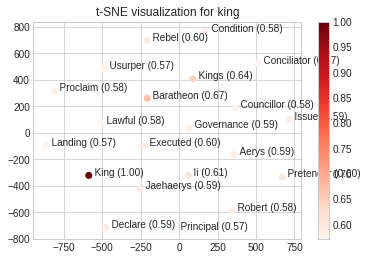

In [0]:
plt.style.use('seaborn-whitegrid')
def tsne_scatterplot(model, search_word):
    labels = [search_word]
    tokens = [model[search_word]]
    similar = [1]
    close_words = model.similar_by_word(search_word, topn=20)
    for word in close_words:
        tokens.append(model[word[0]])
        labels.append(word[0])
        similar.append(word[1])

    tsne_model = TSNE(n_components=2, init='pca')
    coordinates = tsne_model.fit_transform(tokens)
    df = pd.DataFrame({'x': [x for x in coordinates[:, 0]],
                       'y': [y for y in coordinates[:, 1]],
                       'words': labels,
                       'similarity': similar}
                      )
    fig, ax = plt.subplots()
    plot = ax.scatter(df.x, df.y, c=df.similarity, cmap='Reds')
    for i in range(len(df)):
        ax.annotate("  {} ({:.2f})".format(df.words[i].title(),
                                           df.similarity[i]),
                    (df.x[i], df.y[i]))

    plt.colorbar(mappable=plot, ax=ax)
    plt.title('t-SNE visualization for {}'.format(search_word))
    plt.show()
model = Word2Vec.load("GOT_vectors.w2v")
tsne_scatterplot(model, "king")
